# Automated download of research articles 

+ Martina Oppliger Muñoz
+ Nanocell Laboratory
+ University of Concepción
+ October 2021

Requirements
+ os
+ sys
+ requests
+ lxml
+ pandas
+ scihub.py (https://github.com/zaytoun/scihub.py)
+ pmid_title_converter.py (in this repo)
+ Zotero

# 1. Importing requirements

In [6]:
import sys
import os
import pandas as pd

In [24]:
wd = os.getcwd()
print(wd)

/mnt/Contenedor/bioinf/GIT/PaperDownload


# 2. Download Zotero exported bibliograhpy 

## 2.1. Read exported csv with articles of interest

For this you must export the bibliography of interest from zotero in csv format, as exemplified in the following image. If you don't use Zotero as a bibliographic manager, I recommend installing it (https://www.zotero.org/)

Then we read the file with pandas.

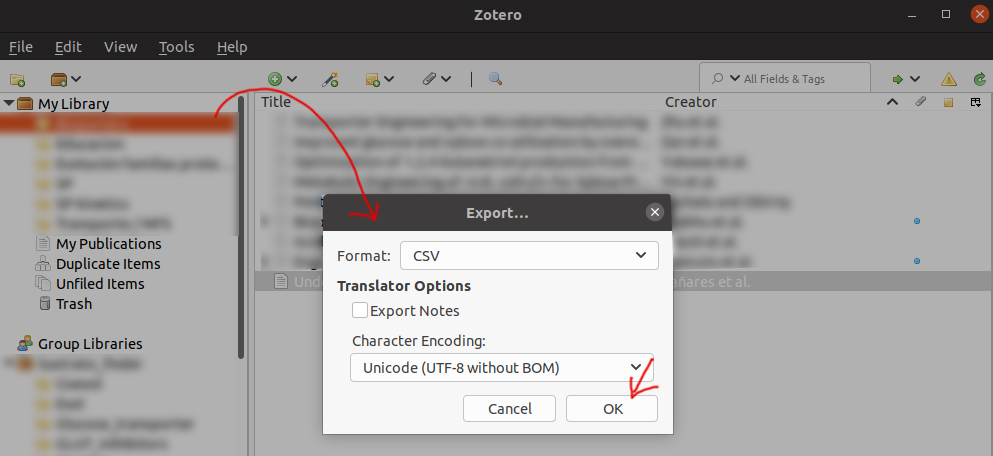

In [25]:
#read csv with bibliography
file = 'bib_test.csv'
df = pd.read_csv(file)
df.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Publication Title', 'ISBN', 'ISSN', 'DOI', 'Url', 'Abstract Note',
       'Date', 'Date Added', 'Date Modified', 'Access Date', 'Pages',
       'Num Pages', 'Issue', 'Volume', 'Number Of Volumes',
       'Journal Abbreviation', 'Short Title', 'Series', 'Series Number',
       'Series Text', 'Series Title', 'Publisher', 'Place', 'Language',
       'Rights', 'Type', 'Archive', 'Archive Location', 'Library Catalog',
       'Call Number', 'Extra', 'Notes', 'File Attachments', 'Link Attachments',
       'Manual Tags', 'Automatic Tags', 'Editor', 'Series Editor',
       'Translator', 'Contributor', 'Attorney Agent', 'Book Author',
       'Cast Member', 'Commenter', 'Composer', 'Cosponsor', 'Counsel',
       'Interviewer', 'Producer', 'Recipient', 'Reviewed Author',
       'Scriptwriter', 'Words By', 'Guest', 'Number', 'Edition',
       'Running Time', 'Scale', 'Medium', 'Artwork Size', 'Filing Date',
       'Applicatio

Then we generate a **bib** list to iterate the search and download of articles using sci-hub api, formatting pdf names as follow:

 + year_first author last name _ title.pdf

If you want to save the pdf in another format, you can edit the script at your convenience.

In [26]:
bib = []
delete = ['/','<i>','</i>',':','.']

for index,row in df.iterrows():
    
    year = str(row['Publication Year'])
    authors = row['Author']
    firstauthor = authors.split(';')[0]
    lastname = firstauthor.split(',')[0]
    title = str(row['Title'])
    for d in delete:
        title = title.replace(d, '')
        
    
    #here we define pdf name. It can be changed  
    
    pdfname = year+'_'+lastname+'_'+title
    bib.append([title,pdfname])
    


## 2.2. Obtaining pmids with pmid_title_converter.py 

In [27]:
orig_stdout = sys.stdout
file = 'temp.txt'
f = open(file, 'w+') 
sys.stdout = f

for paper in bib:
    title = paper[0]
    print(title)
    
sys.stdout = orig_stdout
f.close()

!python pmid_title_converter.py -t2id temp.txt 

os.remove('temp.txt')

idsearch = []
file = 'result.txt'
with open(file,'r') as f:
    lines= f.readlines()
    for line in lines:
        line= line.split('	')
        pmid = line[0]
        title = line[1].strip()
        idsearch.append([pmid,title])
        
os.remove('result.txt')

for paper in bib:
    title = paper[0]
    for search in idsearch:
        pmids = search[0].split(',')
        if title in search[1] and len(pmids)== 1 and search[0] != 'Not Found':
            paper.append(search[0])
        else:
            pass

for paper in bib:
    if len(paper) == 2:
        paper.append('notfound')
print('\n')
print('done')

the script is running

this is a script to convert article paper to pubmedid and vice versa
********************
Sugar transporters in efficient utilization of mixed sugar substrates current knowledge and outlook ===> OK
Synthetic biology in the driving seat of the bioeconomy ===> OK
Thirty years of European biotechnology programmes from biomolecular engineering to the bioeconomy ===> OK


done


In [28]:
bib[0]

['Sugar transporters in efficient utilization of mixed sugar substrates current knowledge and outlook',
 '2010_Jojima_Sugar transporters in efficient utilization of mixed sugar substrates current knowledge and outlook',
 '19838697']

## 2.3. Download articles with scihub.py

To use the sci-hub api you must import scihub.py. For this **you must be located in the directory where the package is installed**. In this case we located the script scihub.py in the same dir we are working. The scritp was obtained from https://github.com/zaytoun/scihub.py

In [29]:
from scihub import SciHub
sh = SciHub()

In [31]:
print('Trying to download %s articles'%len(bib)+'\n')

url = 'https://pubmed.ncbi.nlm.nih.gov/'
outputdir = wd+'/test/' #output directory 


for paper in bib:
    pmid = paper[2]
    pdfname = paper[1]
    output = outputdir +'%s.pdf'%pdfname
    if pmid != 'notfound':
        result = sh.download(url+pmid, path= output)
        print('%s downloaded \n'%pdfname)
    else:
        print('not pmid found for %s \n'%pdfname)
        
print('\n')
print('done')

Trying to download 3 articles

2010_Jojima_Sugar transporters in efficient utilization of mixed sugar substrates current knowledge and outlook downloaded 

2017_Bueso_Synthetic biology in the driving seat of the bioeconomy downloaded 

2013_Aguilar_Thirty years of European biotechnology programmes from biomolecular engineering to the bioeconomy downloaded 



done


**The result is the automated download of articles with the formatted name, as shown in the image:**

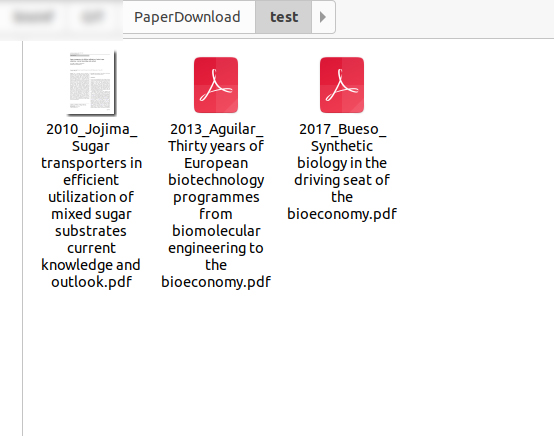

# 3. Download from PMIDs

## 3.1. Individual download (1 item)

In [11]:
url = 'https://pubmed.ncbi.nlm.nih.gov/'
pmid = 'PMID' #pmid to download
output = 'DIR' #directory to save downloaded paper
result = sh.download(url+pmid, path= output)


## 3.2. Download from list

In [ ]:
pmids = #list of pmids
url = 'https://pubmed.ncbi.nlm.nih.gov/'
output = 'DIR' #directory to save downloaded paper

for pmid in pmids:
    result = sh.download(url+pmid, path= output)